In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

#데이터 로딩
df = pd.read_csv('C:/Users/wjdqh/injige/abalone.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1,0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
2,1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
3,2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
4,3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
...,...,...,...,...,...,...,...,...,...,...
4173,4172,F,0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
4174,4173,M,0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
4175,4174,M,0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9
4176,4175,F,0.625,0.485,0.15,1.0945,0.531,0.261,0.296,10


In [49]:
#결측치 확인
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

Rings
9        689
10       634
8        568
11       487
7        391
12       267
6        259
13       203
14       126
5        115
15       103
16        67
17        58
4         57
18        42
19        32
20        26
3         15
21        14
23         9
22         6
27         2
24         2
26         1
29         1
2          1
1          1
25         1
Rings      1
Name: count, dtype: int64
Rings
9        0.164911
10       0.151747
8        0.135950
11       0.116563
7        0.093585
12       0.063906
6        0.061991
13       0.048588
14       0.030158
5        0.027525
15       0.024653
16       0.016036
17       0.013882
4        0.013643
18       0.010053
19       0.007659
20       0.006223
3        0.003590
21       0.003351
23       0.002154
22       0.001436
27       0.000479
24       0.000479
26       0.000239
29       0.000239
2        0.000239
1        0.000239
25       0.000239
Rings    0.000239
Name: proportion, dtype: float64


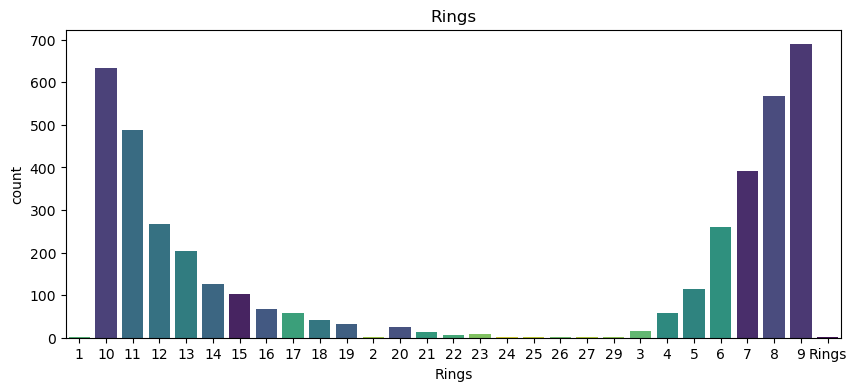

In [51]:
#레이블 분포 확인
print(df['Rings'].value_counts())

print(df['Rings'].value_counts(normalize=True))

# 'Rings' 고유값을 오름차순으로 정렬
sorted_rings = sorted(df['Rings'].unique())

plt.figure(figsize=(10, 4))
sns.countplot(x='Rings', hue='Rings', data=df, palette='viridis', order=sorted_rings)
plt.title('Rings')
plt.show()

In [75]:
# 'Sex' 컬럼만 인코딩 (Label Encoding)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # 'male'은 0, 'female'은 1로 변환

# 'id' 컬럼은 분석에 필요 없으므로 제거
X = df.drop(['Rings', 'id'], axis=1).values  # X는 Rings을 제외한 값
y = df['Rings'].values  # y는 Rings

# 모든 컬럼이 숫자형인지 확인
print(X[0:5, :])  # 처음 5개 데이터 확인

[[   3  134  111   51 2429 1515  880  926]
 [   2   66   56   18  715  417  199  263]
 [   2   45   36   17  285  178   94  113]
 [   0   81   67   26  962  480  280  374]
 [   2   63   56   24  718  400  225  273]]


In [35]:
df['Rings'].value_counts()

Rings
9        689
10       634
8        568
11       487
7        391
12       267
6        259
13       203
14       126
5        115
15       103
16        67
17        58
4         57
18        42
19        32
20        26
3         15
21        14
23         9
22         6
27         2
24         2
26         1
29         1
2          1
1          1
25         1
Rings      1
Name: count, dtype: int64

In [69]:
X

array([[   3,  134,  111, ..., 1515,  880,  926],
       [   2,   66,   56, ...,  417,  199,  263],
       [   2,   45,   36, ...,  178,   94,  113],
       ...,
       [   2,   95,   78, ...,  994,  571,  550],
       [   0,  100,   80, ..., 1005,  518,  530],
       [   2,  117,   94, ..., 1461,  732,  813]], dtype=int64)

In [45]:
y

array(['Rings', '15', '7', ..., '9', '10', '12'], dtype=object)

In [79]:
# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3342, 8), (836, 8), (3342,), (836,))

In [83]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#SVM

clf_svm = SVC(random_state=0) #SVM 모델 생성 (기본 커널 사용)
clf_svm.fit(X_train, y_train) #학습 데이터(X_train, y_train)를 사용하여 모델 학습

pred_svm = clf_svm.predict(X_test) #학습된 모델을 이용해 테스트 데이터(X_test) 예측

print("\n--- SVM Classifier ---")
print("Accuracy:",accuracy_score(y_test, pred_svm))  #정확도 계산 
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_svm)) #혼동행렬 출력

 ACCURACY OF OTHER ML CLASSIFIERS

--- SVM Classifier ---
Accuracy: 0.2942583732057416
Confusion Matrix:
 [[49 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6 13 47]
 [40 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  6 21]
 [18 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  6 12]
 [15  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  5]
 [12  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  5]
 [ 8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  6]
 [ 6  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 6  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [85]:
#DT

#결정 트리 모델 생성 및 학습
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

#테스트 데이터 예측
pred_dt = clf_dt.predict(X_test)

#정확도 및 혼동 행렬 출력
print ("\n--- Decision Tree Classifier ---")
print ("Accuracy:",accuracy_score(y_test, pred_dt))
print ("Confusion Matrix:\n",confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
Accuracy: 0.20334928229665072
Confusion Matrix:
 [[27 31 11  3  4  1  3  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  6 20
  20]
 [22 13  7 10  4  0  1  0  3  0  1  1  0  1  0  0  0  0  0  0  0  0  2  7
  24]
 [ 8  5  6  4  3  3  1  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  4  5
  11]
 [ 5  5  3  2  3  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
   1]
 [ 5  8  1  1  0  1  0  2  0  1  0  1  0  0  1  0  0  0  0  0  0  1  1  2
   2]
 [ 7  0  5  2  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   2]
 [ 1  1  2  1  3  1  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1]
 [ 1  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   1]
 [ 1  1  0  0  1  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  1  1  0  1  0  1  2  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   1]
 [ 1  0  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  1  1  0  0  0  0  1  0  0  0

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  #경고 메세지를 무시

#RF

#랜덤 포레스트 모델 생성 및 학습
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

#테스트 데이터 예측
pred = rf_clf.predict(X_test)

#정확도 및 혼동 행렬 출력
print("Accuracy:",accuracy_score(y_test,pred))
print ("Confusion Matrix:\n",confusion_matrix(y_test, pred))


--- Radom Forest ---
Accuracy: 0.25
Confusion Matrix:
 [[32 21  4  1  2  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  3 23 39]
 [23 24  3  9  3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  2  0  7 24]
 [16 14  1  0  1  1  1  1  0  0  1  1  0  0  0  0  0  0  0  0  0  2  5  9]
 [ 6  4  3  4  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  3]
 [ 7  8  1  2  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  5]
 [ 6  3  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  4]
 [ 2  4  2  0  1  1  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 2  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  1  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  1  1  1  0  1  0  1  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  0  0 

In [89]:
#LR
from sklearn.linear_model import LogisticRegression

#로지스틱 회귀 모델 생성 및 학습
print("\n--- Logistic Regression ---")
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_test)

#테스트 데이터 예측
print("Accuracy:", accuracy_score(y_test, pred_lr))

#정확도 및 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))


--- Logistic Regression ---
Accuracy: 0.27751196172248804
Confusion Matrix:
 [[39 12  1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  8  9 55]
 [36 21  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3 30]
 [18 10  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  9 11]
 [ 9  1  0  5  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  6]
 [ 8  5  1  5  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  3]
 [ 6  4  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  5]
 [ 4  3  0  3  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 2  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  0  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0